In [1]:
import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
if torch.cuda.is_available():
    print("CUDA is available. PyTorch is using GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is NOT available. PyTorch is using CPU.")

PyTorch version: 2.6.0+cu126
Torchvision version: 0.21.0+cu126
CUDA is available. PyTorch is using GPU: NVIDIA GeForce RTX 3060 Laptop GPU


In [2]:
from nn_model import NN_Model
from rule_model import Rule_Model, rule_fall_detection

print(NN_Model)

print(rule_fall_detection)
print(Rule_Model)

<class 'nn_model.NN_Model'>
<function rule_fall_detection at 0x0000024849F46980>
<function Rule_Model at 0x0000024849E8BA60>


In [3]:
import csv
import numpy as np

file_path = "csv_data/ur_keypoints_labeled.csv"
all_data = []

with open(file_path, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        # Convert all but the last column to float32
        float_part = list(map(np.float32, row[:-1]))
        string_part = row[-1]
        all_data.append(float_part + [string_part])

print(all_data[0])
print(len(all_data[0]))

[0.0, 0.0, 21.377562, 14.05296, 78.99814, 0.0, 0.0, 0.030200856, 0.0, 0.0, 0.03486256, 0.0, 0.0, 0.006000614, 0.0, 0.0, 0.16029733, 0.0, 0.0, 0.008379752, 0.0, 0.0, 0.42202255, 0.0, 0.0, 0.18936744, 0.03566222, 0.27296808, 0.5380514, 0.0, 0.0, 0.17341469, 0.0, 0.0, 0.3383477, 0.0, 0.0, 0.13685742, 0.0, 0.0, 0.256842, 0.0, 0.0, 0.16609466, 0.0, 0.0, 0.057011355, 0.0, 0.0, 0.033380967, 0.0, 0.0, 0.024535764, 0.0, 0.0, 0.016800055, 'adl-01-cam0_6']
57


In [4]:
import pandas as pd
import csv
import numpy as np

file_path = "csv_data/mc_keypoints_labeled.csv"

with open(file_path, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        # Convert all but the last column to float32
        float_part = list(map(np.float32, row[:-1]))
        string_part = row[-1]
        all_data.append(float_part + [string_part])

print(len(all_data[-1]))

57


In [5]:
import pandas as pd
import csv
import numpy as np

file_path = "csv_data/le2i_keypoints_labeled.csv"

with open(file_path, "r") as f:
    reader = csv.reader(f)
    for row in reader:
        # Convert all but the last column to float32
        float_part = list(map(np.float32, row[:-1]))
        string_part = row[-1]
        all_data.append(float_part + [string_part])

print(len(all_data[-1]))

# Convert to numpy array (object type because of the mix of float and string)
all_data_np = np.array(all_data, dtype=object)

print("Shape of all_data:", all_data_np.shape)
print("Last column of first row:", all_data_np[0][-1])
print("Last column of first row:", all_data_np[-1][-1])

57
Shape of all_data: (294706, 57)
Last column of first row: adl-01-cam0_6
Last column of first row: le2i189_205


In [6]:
import numpy as np

# Assuming you've already loaded all_data and the first column is the label
labels = all_data_np[:, 0]  # Get the first column

# Count occurrences of 0 and 1
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique.astype(int), counts))

# Print results
not_fall=label_counts.get(0, 0)
fall=label_counts.get(1, 0)
print(f"Not fall (0): {not_fall}")
print(f"Fall (1): {fall}")

Not fall (0): 205210
Fall (1): 89496


In [7]:
import pandas as pd
from sklearn.utils import resample

# Create DataFrame
df = pd.DataFrame.from_records(all_data_np)
header = ['label'] + list(range(len(all_data_np[0]) - 1))
df.columns = header

# Count class instances

print("Before re-sampling, not fall vs fall:")
print(df['label'].value_counts())

# Determine majority and minority
if not_fall < fall:
    print("not_fall_count < fall_count")
    df_minority = df[df.label == 0]  # Not fall
    df_majority = df[df.label == 1]  # Fall
    resample_number = fall
else:
    print("not_fall_count > fall_count")
    df_minority = df[df.label == 1]  # Fall
    df_majority = df[df.label == 0]  # Not fall
    resample_number = not_fall

print("Begin to re-sample...", resample_number)

# Upsample minority
df_minority_upsampled = resample(
    df_minority,
    replace=True,
    n_samples=resample_number,
    random_state=42
)

# Combine and shuffle
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

print("After re-sampling:")
print(df_upsampled['label'].value_counts())


Before re-sampling, not fall vs fall:
label
0.0    205210
1.0     89496
Name: count, dtype: int64
not_fall_count > fall_count
Begin to re-sample... 205210
After re-sampling:
label
0.0    205210
1.0    205210
Name: count, dtype: int64


In [8]:
all_data_np = df_upsampled.values

print(all_data_np[0])
print(len(all_data_np[0]))
print("number of all data:", len(all_data_np))

[0.0 17.765304565429688 128.3868865966797 83.49588012695312
 257.1996154785156 0.0 0.0 0.2862231135368347 0.0 0.0 0.3975674510002136
 0.0 0.0 0.04492932930588722 0.04476585239171982 0.29765233397483826
 0.7859702110290527 0.0 0.0 0.0364493764936924 0.059412214905023575
 0.3245052099227905 0.9598881006240845 0.06616994738578796
 0.3185845613479614 0.7820671796798706 0.06292521953582764
 0.3651409447193146 0.9348546862602234 0.0 0.0 0.3353778123855591
 0.046704716980457306 0.38356178998947144 0.8554349541664124 0.0 0.0
 0.34535834193229675 0.07909833639860153 0.40167051553726196
 0.9669073820114136 0.08356007933616638 0.3971477746963501
 0.9156980514526367 0.05487976223230362 0.44137683510780334
 0.9443801641464233 0.06008262187242508 0.43659496307373047
 0.8298757076263428 0.07314767688512802 0.5004609823226929
 0.8732761144638062 0.07619169354438782 0.4916640520095825
 0.7342963218688965 'chute12/cam2_92']
57
number of all data: 410420


In [9]:
from sklearn.model_selection import train_test_split
# First: split out 80% train
train_data, temp_data = train_test_split(
    all_data_np, test_size=0.20, random_state=42, shuffle=True
)

# Then: split remaining 20% equally into val and test
val_data, test_data = train_test_split(
    temp_data, test_size=0.50, random_state=42, shuffle=True
)

print(f"Train size: {len(train_data)}, Val size: {len(val_data)}, Test size: {len(test_data)}")


Train size: 328336, Val size: 41042, Test size: 41042


In [10]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Prepare training data
def prepare_data(data):
    x = []
    y = []
    for record in data:
        # slide to take 51 keypoint features, for NN model we need to exclude name at the end
        x.append(record[5:-1])
        y.append(int(record[0]))
    
    x = np.array(x, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    # Reshape x to (batch, time_steps, features)
    #x = x.reshape((len(x), 1, x.shape[1]))  # (batch, 1, features)

    # Convert to tensors
    x_tensor = torch.tensor(x)
    y_tensor = torch.tensor(y).unsqueeze(1)  # Shape (batch, 1)
    
    return x_tensor, y_tensor

# Convert train, val, test data into tensors
x_train, y_train = prepare_data(train_data)
x_val, y_val = prepare_data(val_data)
x_test, y_test = prepare_data(test_data)

# Create dataset for train, val, and test
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

batch_size = 32

# Create DataLoader for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size)
test_loader = DataLoader(test_dataset, batch_size)

In [11]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from utils import EarlyStopping

def train_model(model, criterion, optimizer, epochs, train_loader, val_loader, scheduler, patience=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("Using device:", device)
    print(f"Start training model: {type(model).__name__}")
    model.to(device)

    train_losses = []
    val_losses = []
    val_accuracies = []

    # Initialize EarlyStopping
    early_stopping = EarlyStopping(patience=patience)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        # Update learning rate using scheduler
        lr = scheduler(epoch)
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr

        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=True)
        for inputs, labels in loop:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            loop.set_postfix(loss=loss.item())

        train_loss = total_loss / len(train_loader)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                preds = (outputs > 0.5).float()  # Binary thresholding
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_loss /= len(val_loader)
        acc = accuracy_score(all_labels, all_preds)

        val_losses.append(val_loss)
        val_accuracies.append(acc)

        # Print loss and accuracy after each epoch
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Acc={acc:.4f}")

        # Early stopping check
        if early_stopping(val_loss, model):
            print(f"Early stopping triggered after {epoch+1} epochs")
            break  # Stop training early

    # Restore the model with the best weights
    # early_stopping.restore_best_weights(model)
    print(f"Finish training model: {type(model).__name__}")
    return model, train_losses, val_losses, val_accuracies


In [11]:
# Note: I run this on my local machine with RTX3060 so I have to clear cache each time

import gc
gc.collect()
torch.cuda.empty_cache()

print("Successfully clear the cache")

Successfully clear the cache


In [14]:
import torch.nn as nn
import torch.optim as optim
from utils import scheduler

nn_model = NN_Model()

# Set up the loss function and optimizer
cnn_criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
cnn_optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

cnn_epochs = 20  # Set number of epochs

nn_model, cnn_train_losses, cnn_val_losses, cnn_val_accuracies = train_model(
        nn_model,
        criterion=cnn_criterion, 
        optimizer=cnn_optimizer, 
        epochs=cnn_epochs, 
        train_loader=train_loader, 
        val_loader=val_loader, 
        scheduler=scheduler,
        patience=5)


Using device: cuda
Start training model: NN_Model


Epoch [1/20]: 100%|██████████| 3845/3845 [00:13<00:00, 295.54it/s, loss=0.072] 


Epoch 1: Train Loss=0.3622, Val Loss=0.3240, Val Acc=0.8610


Epoch [2/20]: 100%|██████████| 3845/3845 [00:12<00:00, 316.19it/s, loss=0.531] 


Epoch 2: Train Loss=0.2899, Val Loss=0.2635, Val Acc=0.8875


Epoch [3/20]: 100%|██████████| 3845/3845 [00:12<00:00, 318.07it/s, loss=0.249] 


Epoch 3: Train Loss=0.2560, Val Loss=0.2305, Val Acc=0.9023


Epoch [4/20]: 100%|██████████| 3845/3845 [00:11<00:00, 347.73it/s, loss=0.0588]


Epoch 4: Train Loss=0.2304, Val Loss=0.2202, Val Acc=0.9073


Epoch [5/20]: 100%|██████████| 3845/3845 [00:11<00:00, 341.22it/s, loss=0.0905]


Epoch 5: Train Loss=0.2118, Val Loss=0.2028, Val Acc=0.9161


Epoch [6/20]: 100%|██████████| 3845/3845 [00:11<00:00, 322.69it/s, loss=0.149] 


Epoch 6: Train Loss=0.1969, Val Loss=0.1845, Val Acc=0.9255


Epoch [7/20]: 100%|██████████| 3845/3845 [00:11<00:00, 322.05it/s, loss=0.357] 


Epoch 7: Train Loss=0.1865, Val Loss=0.1798, Val Acc=0.9311


Epoch [8/20]: 100%|██████████| 3845/3845 [00:12<00:00, 309.74it/s, loss=0.0899]


Epoch 8: Train Loss=0.1748, Val Loss=0.1746, Val Acc=0.9305


Epoch [9/20]: 100%|██████████| 3845/3845 [00:19<00:00, 199.49it/s, loss=0.0327]


Epoch 9: Train Loss=0.1666, Val Loss=0.1592, Val Acc=0.9370


Epoch [10/20]: 100%|██████████| 3845/3845 [00:17<00:00, 220.23it/s, loss=0.275] 


Epoch 10: Train Loss=0.1610, Val Loss=0.1676, Val Acc=0.9347


Epoch [11/20]: 100%|██████████| 3845/3845 [00:13<00:00, 276.10it/s, loss=0.0352]


Epoch 11: Train Loss=0.1534, Val Loss=0.1604, Val Acc=0.9367


Epoch [12/20]: 100%|██████████| 3845/3845 [00:11<00:00, 321.45it/s, loss=0.262]  


Epoch 12: Train Loss=0.1435, Val Loss=0.1444, Val Acc=0.9425


Epoch [13/20]: 100%|██████████| 3845/3845 [00:12<00:00, 303.20it/s, loss=0.0275] 


Epoch 13: Train Loss=0.1344, Val Loss=0.1218, Val Acc=0.9560


Epoch [14/20]: 100%|██████████| 3845/3845 [00:12<00:00, 310.98it/s, loss=0.00685]


Epoch 14: Train Loss=0.1265, Val Loss=0.1267, Val Acc=0.9503


Epoch [15/20]: 100%|██████████| 3845/3845 [00:12<00:00, 307.50it/s, loss=0.0484] 


Epoch 15: Train Loss=0.1189, Val Loss=0.1244, Val Acc=0.9515


Epoch [16/20]: 100%|██████████| 3845/3845 [00:12<00:00, 311.94it/s, loss=0.585]  


Epoch 16: Train Loss=0.1126, Val Loss=0.1254, Val Acc=0.9543


Epoch [17/20]: 100%|██████████| 3845/3845 [00:12<00:00, 305.51it/s, loss=0.15]   


Epoch 17: Train Loss=0.1062, Val Loss=0.1316, Val Acc=0.9497


Epoch [18/20]: 100%|██████████| 3845/3845 [00:13<00:00, 277.80it/s, loss=0.0449] 


Epoch 18: Train Loss=0.1009, Val Loss=0.1053, Val Acc=0.9625


Epoch [19/20]: 100%|██████████| 3845/3845 [00:14<00:00, 273.20it/s, loss=0.328]  


Epoch 19: Train Loss=0.0959, Val Loss=0.0981, Val Acc=0.9653


Epoch [20/20]: 100%|██████████| 3845/3845 [00:13<00:00, 289.65it/s, loss=0.0463] 


Epoch 20: Train Loss=0.0915, Val Loss=0.0948, Val Acc=0.9681
Finish training model: NN_Model


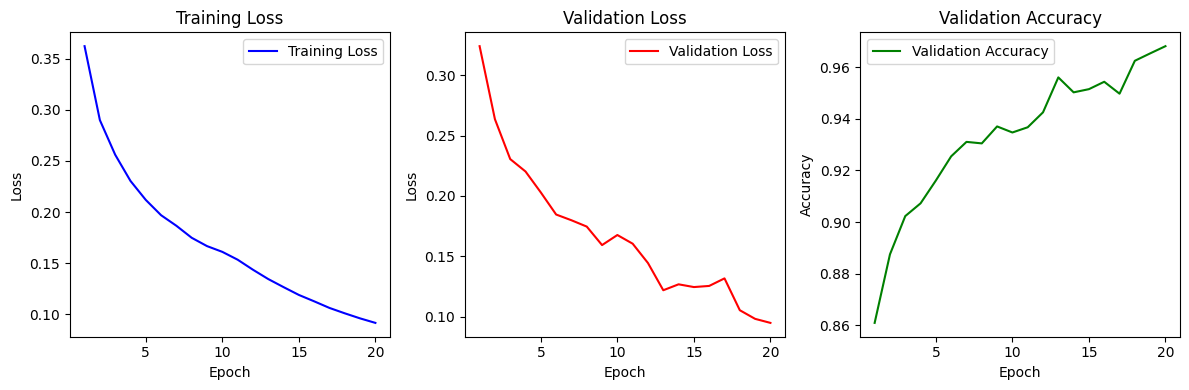

In [15]:
# Example usage:
from utils import plot_training_results
plot_training_results(cnn_train_losses, cnn_val_losses, cnn_val_accuracies)

In [21]:
torch.save(nn_model.state_dict(), "./model/nn_model.pth")

In [10]:
def perform_model_on_test_dataset(model, test_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():  # Disable gradient calculation for testing
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float()  # Assuming sigmoid output, convert to 0 or 1
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f'Model Test Accuracy: {accuracy * 100:.2f}%')

In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

load_nn_model = NN_Model()
load_nn_model.load_state_dict(torch.load('./model/nn_model.pth'))

# Set the model to evaluation mode (important for inference)
load_nn_model.eval()
load_nn_model.to(device)

# Example usage:
perform_model_on_test_dataset(load_nn_model, test_loader, device)

Model Test Accuracy: 97.98%


In [12]:
import torch
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Prepare training data
def prepare_data_no_confidence(data):
    x = []
    y = []
    for record in data:
        # slide to take 51 keypoint features, for NN model we need to exclude name at the end
        flat = record[5:-1]
        xy_only = [flat[i] for i in range(len(flat)) if i % 3 != 2]
        x.append(xy_only)
        y.append(int(record[0]))

    x = np.array(x, dtype=np.float32)
    y = np.array(y, dtype=np.float32)

    # Reshape x to (batch, time_steps, features)
    #x = x.reshape((len(x), 1, x.shape[1]))  # (batch, 1, features)

    # Convert to tensors
    x_tensor = torch.tensor(x)
    y_tensor = torch.tensor(y).unsqueeze(1)  # Shape (batch, 1)

    return x_tensor, y_tensor

# Convert train, val, test data into tensors
x_train_no_conf, y_train_no_conf = prepare_data_no_confidence(train_data)
x_val_no_conf, y_val_no_conf = prepare_data_no_confidence(val_data)
x_test_no_conf, y_test_no_conf = prepare_data_no_confidence(test_data)

print(len(x_train_no_conf[0]))
print(x_train_no_conf[0])
# Create dataset for train, val, and test
train_dataset_no_conf = TensorDataset(x_train_no_conf, y_train_no_conf)
val_dataset_no_conf = TensorDataset(x_val_no_conf, y_val_no_conf)
test_dataset_no_conf = TensorDataset(x_test_no_conf, y_test_no_conf)

batch_size = 128

# Create DataLoader for training, validation, and testing
train_loader_no_conf = DataLoader(train_dataset_no_conf, batch_size, shuffle=True)
val_loader_no_conf = DataLoader(val_dataset_no_conf, batch_size)
test_loader_no_conf = DataLoader(test_dataset_no_conf, batch_size)

34
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0311, 0.3848, 0.0000,
        0.0000, 0.0824, 0.4882, 0.0898, 0.4932, 0.1658, 0.5565, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.1508, 0.6052, 0.1543, 0.6112, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])


In [13]:
print(len(train_dataset_no_conf))

328336


In [14]:
import torch.nn as nn
import torch.optim as optim
from utils import scheduler
from nn_model import NN_Model_NO_CONF

nn_model_no_conf = NN_Model_NO_CONF()

# Set up the loss function and optimizer
cnn_criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
cnn_optimizer = optim.Adam(nn_model_no_conf.parameters(), lr=0.001, weight_decay=1e-5)

cnn_epochs = 200  # Set number of epochs

nn_model_no_conf, cnn_train_losses, cnn_val_losses, cnn_val_accuracies = train_model(
        nn_model_no_conf,
        criterion=cnn_criterion,
        optimizer=cnn_optimizer,
        epochs=cnn_epochs,
        train_loader=train_loader_no_conf,
        val_loader=val_loader_no_conf,
        scheduler=scheduler,
        patience=10)


Using device: cuda
Start training model: NN_Model_NO_CONF


Epoch [1/200]: 100%|██████████| 2566/2566 [00:28<00:00, 89.16it/s, loss=0.563] 


Epoch 1: Train Loss=0.5598, Val Loss=0.5268, Val Acc=0.7252


Epoch [2/200]: 100%|██████████| 2566/2566 [00:30<00:00, 82.93it/s, loss=0.591] 


Epoch 2: Train Loss=0.4970, Val Loss=0.4756, Val Acc=0.7654


Epoch [3/200]: 100%|██████████| 2566/2566 [00:27<00:00, 93.81it/s, loss=0.287] 


Epoch 3: Train Loss=0.4711, Val Loss=0.4572, Val Acc=0.7775


Epoch [4/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.22it/s, loss=0.459] 


Epoch 4: Train Loss=0.4531, Val Loss=0.4422, Val Acc=0.7851


Epoch [5/200]: 100%|██████████| 2566/2566 [00:28<00:00, 88.88it/s, loss=0.477] 


Epoch 5: Train Loss=0.4390, Val Loss=0.4263, Val Acc=0.7955


Epoch [6/200]: 100%|██████████| 2566/2566 [00:29<00:00, 86.98it/s, loss=0.525] 


Epoch 6: Train Loss=0.4284, Val Loss=0.4188, Val Acc=0.8005


Epoch [7/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.24it/s, loss=0.282] 


Epoch 7: Train Loss=0.4192, Val Loss=0.4100, Val Acc=0.8066


Epoch [8/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.20it/s, loss=0.469] 


Epoch 8: Train Loss=0.4116, Val Loss=0.4080, Val Acc=0.8031


Epoch [9/200]: 100%|██████████| 2566/2566 [00:27<00:00, 91.83it/s, loss=0.619] 


Epoch 9: Train Loss=0.4049, Val Loss=0.4004, Val Acc=0.8084


Epoch [10/200]: 100%|██████████| 2566/2566 [00:27<00:00, 93.90it/s, loss=0.376] 


Epoch 10: Train Loss=0.3993, Val Loss=0.3949, Val Acc=0.8131


Epoch [11/200]: 100%|██████████| 2566/2566 [00:29<00:00, 85.96it/s, loss=0.325] 


Epoch 11: Train Loss=0.3941, Val Loss=0.3886, Val Acc=0.8184


Epoch [12/200]: 100%|██████████| 2566/2566 [00:27<00:00, 94.19it/s, loss=0.311] 


Epoch 12: Train Loss=0.3869, Val Loss=0.3913, Val Acc=0.8105


Epoch [13/200]: 100%|██████████| 2566/2566 [00:25<00:00, 101.02it/s, loss=0.366]


Epoch 13: Train Loss=0.3806, Val Loss=0.3885, Val Acc=0.8137


Epoch [14/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.04it/s, loss=0.628] 


Epoch 14: Train Loss=0.3750, Val Loss=0.3737, Val Acc=0.8238


Epoch [15/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.50it/s, loss=0.327] 


Epoch 15: Train Loss=0.3691, Val Loss=0.3692, Val Acc=0.8273


Epoch [16/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.38it/s, loss=0.15]  


Epoch 16: Train Loss=0.3651, Val Loss=0.3749, Val Acc=0.8202


Epoch [17/200]: 100%|██████████| 2566/2566 [00:29<00:00, 86.51it/s, loss=0.254] 


Epoch 17: Train Loss=0.3600, Val Loss=0.3607, Val Acc=0.8327


Epoch [18/200]: 100%|██████████| 2566/2566 [00:29<00:00, 88.30it/s, loss=0.419] 


Epoch 18: Train Loss=0.3566, Val Loss=0.3588, Val Acc=0.8353


Epoch [19/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.13it/s, loss=0.265] 


Epoch 19: Train Loss=0.3530, Val Loss=0.3544, Val Acc=0.8401


Epoch [20/200]: 100%|██████████| 2566/2566 [00:28<00:00, 89.15it/s, loss=0.458] 


Epoch 20: Train Loss=0.3495, Val Loss=0.3544, Val Acc=0.8382


Epoch [21/200]: 100%|██████████| 2566/2566 [00:29<00:00, 86.35it/s, loss=0.241] 


Epoch 21: Train Loss=0.3461, Val Loss=0.3592, Val Acc=0.8292


Epoch [22/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.06it/s, loss=0.292] 


Epoch 22: Train Loss=0.3432, Val Loss=0.3457, Val Acc=0.8387


Epoch [23/200]: 100%|██████████| 2566/2566 [00:26<00:00, 95.27it/s, loss=0.312] 


Epoch 23: Train Loss=0.3412, Val Loss=0.3431, Val Acc=0.8461


Epoch [24/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.11it/s, loss=0.484] 


Epoch 24: Train Loss=0.3386, Val Loss=0.3408, Val Acc=0.8465


Epoch [25/200]: 100%|██████████| 2566/2566 [00:30<00:00, 85.45it/s, loss=0.344] 


Epoch 25: Train Loss=0.3370, Val Loss=0.3400, Val Acc=0.8476


Epoch [26/200]: 100%|██████████| 2566/2566 [00:24<00:00, 103.94it/s, loss=0.374]


Epoch 26: Train Loss=0.3349, Val Loss=0.3396, Val Acc=0.8471


Epoch [27/200]: 100%|██████████| 2566/2566 [00:09<00:00, 282.28it/s, loss=0.22] 


Epoch 27: Train Loss=0.3329, Val Loss=0.3490, Val Acc=0.8404


Epoch [28/200]: 100%|██████████| 2566/2566 [00:09<00:00, 274.34it/s, loss=0.497]


Epoch 28: Train Loss=0.3317, Val Loss=0.3382, Val Acc=0.8456


Epoch [29/200]: 100%|██████████| 2566/2566 [00:09<00:00, 277.89it/s, loss=0.245]


Epoch 29: Train Loss=0.3300, Val Loss=0.3385, Val Acc=0.8417


Epoch [30/200]: 100%|██████████| 2566/2566 [00:10<00:00, 249.64it/s, loss=0.353]


Epoch 30: Train Loss=0.3289, Val Loss=0.3348, Val Acc=0.8483


Epoch [31/200]: 100%|██████████| 2566/2566 [00:10<00:00, 247.17it/s, loss=0.287]


Epoch 31: Train Loss=0.3276, Val Loss=0.3339, Val Acc=0.8479


Epoch [32/200]: 100%|██████████| 2566/2566 [00:10<00:00, 244.88it/s, loss=0.286]


Epoch 32: Train Loss=0.3263, Val Loss=0.3319, Val Acc=0.8516


Epoch [33/200]: 100%|██████████| 2566/2566 [00:09<00:00, 269.89it/s, loss=0.27] 


Epoch 33: Train Loss=0.3255, Val Loss=0.3318, Val Acc=0.8509


Epoch [34/200]: 100%|██████████| 2566/2566 [00:09<00:00, 262.64it/s, loss=0.274]


Epoch 34: Train Loss=0.3247, Val Loss=0.3322, Val Acc=0.8446


Epoch [35/200]: 100%|██████████| 2566/2566 [00:09<00:00, 267.77it/s, loss=0.265]


Epoch 35: Train Loss=0.3238, Val Loss=0.3318, Val Acc=0.8499


Epoch [36/200]: 100%|██████████| 2566/2566 [00:09<00:00, 277.27it/s, loss=0.302]


Epoch 36: Train Loss=0.3231, Val Loss=0.3300, Val Acc=0.8516


Epoch [37/200]: 100%|██████████| 2566/2566 [00:09<00:00, 274.44it/s, loss=0.198]


Epoch 37: Train Loss=0.3226, Val Loss=0.3292, Val Acc=0.8510


Epoch [38/200]: 100%|██████████| 2566/2566 [00:08<00:00, 286.44it/s, loss=0.287]


Epoch 38: Train Loss=0.3218, Val Loss=0.3291, Val Acc=0.8519


Epoch [39/200]: 100%|██████████| 2566/2566 [00:16<00:00, 159.43it/s, loss=0.357]


Epoch 39: Train Loss=0.3214, Val Loss=0.3282, Val Acc=0.8519


Epoch [40/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.49it/s, loss=0.15]  


Epoch 40: Train Loss=0.3208, Val Loss=0.3279, Val Acc=0.8531


Epoch [41/200]: 100%|██████████| 2566/2566 [00:24<00:00, 103.03it/s, loss=0.212]


Epoch 41: Train Loss=0.3204, Val Loss=0.3278, Val Acc=0.8524


Epoch [42/200]: 100%|██████████| 2566/2566 [00:24<00:00, 104.07it/s, loss=0.268]


Epoch 42: Train Loss=0.3200, Val Loss=0.3269, Val Acc=0.8539


Epoch [43/200]: 100%|██████████| 2566/2566 [00:24<00:00, 104.20it/s, loss=0.175]


Epoch 43: Train Loss=0.3196, Val Loss=0.3269, Val Acc=0.8528


Epoch [44/200]: 100%|██████████| 2566/2566 [00:24<00:00, 104.08it/s, loss=0.293]


Epoch 44: Train Loss=0.3193, Val Loss=0.3267, Val Acc=0.8531


Epoch [45/200]: 100%|██████████| 2566/2566 [00:24<00:00, 105.67it/s, loss=0.15] 


Epoch 45: Train Loss=0.3190, Val Loss=0.3262, Val Acc=0.8530


Epoch [46/200]: 100%|██████████| 2566/2566 [00:24<00:00, 104.19it/s, loss=0.781]


Epoch 46: Train Loss=0.3188, Val Loss=0.3259, Val Acc=0.8540


Epoch [47/200]: 100%|██████████| 2566/2566 [00:24<00:00, 102.76it/s, loss=0.436]


Epoch 47: Train Loss=0.3185, Val Loss=0.3262, Val Acc=0.8538


Epoch [48/200]: 100%|██████████| 2566/2566 [00:24<00:00, 103.62it/s, loss=0.242]


Epoch 48: Train Loss=0.3182, Val Loss=0.3256, Val Acc=0.8537


Epoch [49/200]: 100%|██████████| 2566/2566 [00:26<00:00, 96.07it/s, loss=0.193] 


Epoch 49: Train Loss=0.3179, Val Loss=0.3259, Val Acc=0.8530


Epoch [50/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.58it/s, loss=0.257] 


Epoch 50: Train Loss=0.3178, Val Loss=0.3255, Val Acc=0.8537


Epoch [51/200]: 100%|██████████| 2566/2566 [00:28<00:00, 89.62it/s, loss=0.373] 


Epoch 51: Train Loss=0.3177, Val Loss=0.3254, Val Acc=0.8541


Epoch [52/200]: 100%|██████████| 2566/2566 [00:28<00:00, 88.75it/s, loss=0.304] 


Epoch 52: Train Loss=0.3175, Val Loss=0.3249, Val Acc=0.8548


Epoch [53/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.02it/s, loss=0.35]  


Epoch 53: Train Loss=0.3174, Val Loss=0.3253, Val Acc=0.8546


Epoch [54/200]: 100%|██████████| 2566/2566 [00:29<00:00, 86.86it/s, loss=0.25]  


Epoch 54: Train Loss=0.3172, Val Loss=0.3253, Val Acc=0.8544


Epoch [55/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.15it/s, loss=0.263] 


Epoch 55: Train Loss=0.3171, Val Loss=0.3262, Val Acc=0.8538


Epoch [56/200]: 100%|██████████| 2566/2566 [00:29<00:00, 85.67it/s, loss=0.426] 


Epoch 56: Train Loss=0.3171, Val Loss=0.3249, Val Acc=0.8544


Epoch [57/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.03it/s, loss=0.33]  


Epoch 57: Train Loss=0.3169, Val Loss=0.3248, Val Acc=0.8543


Epoch [58/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.16it/s, loss=0.289] 


Epoch 58: Train Loss=0.3168, Val Loss=0.3247, Val Acc=0.8547


Epoch [59/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.06it/s, loss=0.32]  


Epoch 59: Train Loss=0.3167, Val Loss=0.3246, Val Acc=0.8549


Epoch [60/200]: 100%|██████████| 2566/2566 [00:28<00:00, 88.82it/s, loss=0.351] 


Epoch 60: Train Loss=0.3167, Val Loss=0.3246, Val Acc=0.8548


Epoch [61/200]: 100%|██████████| 2566/2566 [00:29<00:00, 88.10it/s, loss=0.454] 


Epoch 61: Train Loss=0.3167, Val Loss=0.3245, Val Acc=0.8547


Epoch [62/200]: 100%|██████████| 2566/2566 [00:30<00:00, 85.31it/s, loss=0.414] 


Epoch 62: Train Loss=0.3166, Val Loss=0.3245, Val Acc=0.8547


Epoch [63/200]: 100%|██████████| 2566/2566 [00:29<00:00, 86.32it/s, loss=0.321] 


Epoch 63: Train Loss=0.3165, Val Loss=0.3245, Val Acc=0.8545


Epoch [64/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.21it/s, loss=0.207] 


Epoch 64: Train Loss=0.3164, Val Loss=0.3244, Val Acc=0.8547


Epoch [65/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.41it/s, loss=0.236] 


Epoch 65: Train Loss=0.3164, Val Loss=0.3245, Val Acc=0.8546


Epoch [66/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.67it/s, loss=0.198] 


Epoch 66: Train Loss=0.3163, Val Loss=0.3244, Val Acc=0.8549


Epoch [67/200]: 100%|██████████| 2566/2566 [00:28<00:00, 88.52it/s, loss=0.807] 


Epoch 67: Train Loss=0.3165, Val Loss=0.3243, Val Acc=0.8549


Epoch [68/200]: 100%|██████████| 2566/2566 [00:26<00:00, 96.65it/s, loss=0.145] 


Epoch 68: Train Loss=0.3162, Val Loss=0.3244, Val Acc=0.8550


Epoch [69/200]: 100%|██████████| 2566/2566 [00:25<00:00, 100.90it/s, loss=0.311]


Epoch 69: Train Loss=0.3162, Val Loss=0.3243, Val Acc=0.8550


Epoch [70/200]: 100%|██████████| 2566/2566 [00:26<00:00, 97.82it/s, loss=0.36]  


Epoch 70: Train Loss=0.3162, Val Loss=0.3243, Val Acc=0.8546


Epoch [71/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.62it/s, loss=0.298] 


Epoch 71: Train Loss=0.3162, Val Loss=0.3243, Val Acc=0.8547


Epoch [72/200]: 100%|██████████| 2566/2566 [00:28<00:00, 88.67it/s, loss=0.2]   


Epoch 72: Train Loss=0.3161, Val Loss=0.3243, Val Acc=0.8552


Epoch [73/200]: 100%|██████████| 2566/2566 [00:26<00:00, 95.04it/s, loss=0.285] 


Epoch 73: Train Loss=0.3161, Val Loss=0.3243, Val Acc=0.8550


Epoch [74/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.64it/s, loss=0.231] 


Epoch 74: Train Loss=0.3161, Val Loss=0.3243, Val Acc=0.8547


Epoch [75/200]: 100%|██████████| 2566/2566 [00:28<00:00, 89.94it/s, loss=0.295] 


Epoch 75: Train Loss=0.3161, Val Loss=0.3242, Val Acc=0.8549


Epoch [76/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.36it/s, loss=0.15]  


Epoch 76: Train Loss=0.3160, Val Loss=0.3243, Val Acc=0.8548


Epoch [77/200]: 100%|██████████| 2566/2566 [00:26<00:00, 95.65it/s, loss=0.447] 


Epoch 77: Train Loss=0.3161, Val Loss=0.3243, Val Acc=0.8549


Epoch [78/200]: 100%|██████████| 2566/2566 [00:26<00:00, 95.59it/s, loss=0.197] 


Epoch 78: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8549


Epoch [79/200]: 100%|██████████| 2566/2566 [00:28<00:00, 91.64it/s, loss=0.331] 


Epoch 79: Train Loss=0.3161, Val Loss=0.3242, Val Acc=0.8549


Epoch [80/200]: 100%|██████████| 2566/2566 [00:28<00:00, 90.84it/s, loss=0.227] 


Epoch 80: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [81/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.66it/s, loss=0.277] 


Epoch 81: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8551


Epoch [82/200]: 100%|██████████| 2566/2566 [00:27<00:00, 94.47it/s, loss=0.369] 


Epoch 82: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [83/200]: 100%|██████████| 2566/2566 [00:27<00:00, 93.19it/s, loss=0.422] 


Epoch 83: Train Loss=0.3161, Val Loss=0.3242, Val Acc=0.8549


Epoch [84/200]: 100%|██████████| 2566/2566 [00:26<00:00, 96.92it/s, loss=0.213] 


Epoch 84: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8549


Epoch [85/200]: 100%|██████████| 2566/2566 [00:20<00:00, 124.95it/s, loss=0.265]


Epoch 85: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8549


Epoch [86/200]: 100%|██████████| 2566/2566 [00:09<00:00, 267.33it/s, loss=0.311]


Epoch 86: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8548


Epoch [87/200]: 100%|██████████| 2566/2566 [00:10<00:00, 238.95it/s, loss=0.15] 


Epoch 87: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [88/200]: 100%|██████████| 2566/2566 [00:10<00:00, 240.97it/s, loss=0.205]


Epoch 88: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8549


Epoch [89/200]: 100%|██████████| 2566/2566 [00:10<00:00, 249.32it/s, loss=0.252]


Epoch 89: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [90/200]: 100%|██████████| 2566/2566 [00:10<00:00, 250.49it/s, loss=0.387]


Epoch 90: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8551


Epoch [91/200]: 100%|██████████| 2566/2566 [00:09<00:00, 270.09it/s, loss=0.519]


Epoch 91: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [92/200]: 100%|██████████| 2566/2566 [00:09<00:00, 280.38it/s, loss=0.504]


Epoch 92: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [93/200]: 100%|██████████| 2566/2566 [00:08<00:00, 288.84it/s, loss=0.397]


Epoch 93: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [94/200]: 100%|██████████| 2566/2566 [00:09<00:00, 276.17it/s, loss=0.344]


Epoch 94: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [95/200]: 100%|██████████| 2566/2566 [00:09<00:00, 257.50it/s, loss=0.144]


Epoch 95: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8551


Epoch [96/200]: 100%|██████████| 2566/2566 [00:09<00:00, 267.01it/s, loss=0.231]


Epoch 96: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [97/200]: 100%|██████████| 2566/2566 [00:09<00:00, 263.55it/s, loss=0.229]


Epoch 97: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [98/200]: 100%|██████████| 2566/2566 [00:10<00:00, 253.68it/s, loss=0.241]


Epoch 98: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [99/200]: 100%|██████████| 2566/2566 [00:29<00:00, 87.72it/s, loss=0.42] 


Epoch 99: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [100/200]: 100%|██████████| 2566/2566 [00:27<00:00, 94.75it/s, loss=0.354] 


Epoch 100: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [101/200]: 100%|██████████| 2566/2566 [00:28<00:00, 89.79it/s, loss=0.395] 


Epoch 101: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [102/200]: 100%|██████████| 2566/2566 [00:26<00:00, 95.74it/s, loss=0.399] 


Epoch 102: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [103/200]: 100%|██████████| 2566/2566 [00:27<00:00, 92.22it/s, loss=0.579] 


Epoch 103: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [104/200]: 100%|██████████| 2566/2566 [00:13<00:00, 183.38it/s, loss=0.224]


Epoch 104: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [105/200]: 100%|██████████| 2566/2566 [00:31<00:00, 82.17it/s, loss=0.344] 


Epoch 105: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [106/200]: 100%|██████████| 2566/2566 [00:27<00:00, 95.00it/s, loss=0.177] 


Epoch 106: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [107/200]: 100%|██████████| 2566/2566 [00:12<00:00, 199.54it/s, loss=0.304]


Epoch 107: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [108/200]: 100%|██████████| 2566/2566 [00:10<00:00, 248.38it/s, loss=0.2]  


Epoch 108: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [109/200]: 100%|██████████| 2566/2566 [00:10<00:00, 243.36it/s, loss=0.405]


Epoch 109: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [110/200]: 100%|██████████| 2566/2566 [00:09<00:00, 262.68it/s, loss=0.29] 


Epoch 110: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [111/200]: 100%|██████████| 2566/2566 [00:09<00:00, 260.26it/s, loss=0.216]


Epoch 111: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [112/200]: 100%|██████████| 2566/2566 [00:09<00:00, 260.79it/s, loss=0.214]


Epoch 112: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [113/200]: 100%|██████████| 2566/2566 [00:09<00:00, 278.91it/s, loss=0.195]


Epoch 113: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [114/200]: 100%|██████████| 2566/2566 [00:09<00:00, 273.25it/s, loss=0.256]


Epoch 114: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [115/200]: 100%|██████████| 2566/2566 [00:09<00:00, 263.93it/s, loss=0.291]


Epoch 115: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [116/200]: 100%|██████████| 2566/2566 [00:10<00:00, 251.12it/s, loss=0.293]


Epoch 116: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [117/200]: 100%|██████████| 2566/2566 [00:09<00:00, 265.82it/s, loss=0.379]


Epoch 117: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [118/200]: 100%|██████████| 2566/2566 [00:09<00:00, 284.58it/s, loss=0.408]


Epoch 118: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [119/200]: 100%|██████████| 2566/2566 [00:08<00:00, 286.53it/s, loss=0.242]


Epoch 119: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [120/200]: 100%|██████████| 2566/2566 [00:09<00:00, 282.06it/s, loss=0.203]


Epoch 120: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550


Epoch [121/200]: 100%|██████████| 2566/2566 [00:09<00:00, 276.99it/s, loss=0.354]


Epoch 121: Train Loss=0.3160, Val Loss=0.3242, Val Acc=0.8550


Epoch [122/200]: 100%|██████████| 2566/2566 [00:09<00:00, 269.64it/s, loss=0.237]


Epoch 122: Train Loss=0.3159, Val Loss=0.3242, Val Acc=0.8550
Early stopping triggered after 122 epochs
Finish training model: NN_Model_NO_CONF


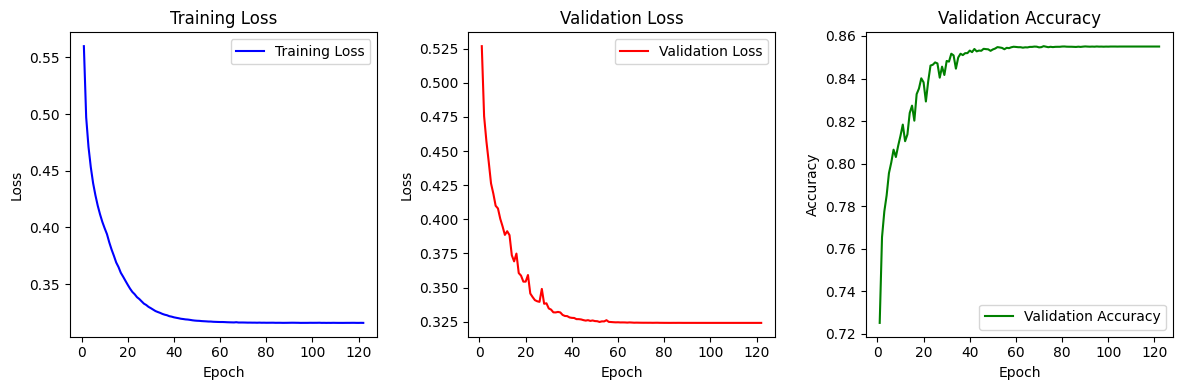

In [15]:
from utils import plot_training_results
plot_training_results(cnn_train_losses, cnn_val_losses, cnn_val_accuracies)

In [16]:
torch.save(nn_model_no_conf.state_dict(), "./model/nn_model_no_conf.pth")

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

load_nn_model_no_conf = NN_Model_NO_CONF()
load_nn_model_no_conf.load_state_dict(torch.load('./model/nn_model_no_conf.pth'))

# Set the model to evaluation mode (important for inference)
load_nn_model_no_conf.eval()
load_nn_model_no_conf.to(device)

# Example usage:
perform_model_on_test_dataset(load_nn_model_no_conf, test_loader_no_conf, device)

Model Test Accuracy: 85.31%


In [27]:
import torch.nn as nn
import torch.optim as optim
from utils import scheduler
from nn_model import NN_Model_NO_CONF_2

nn_model_no_conf2 = NN_Model_NO_CONF_2()

# Set up the loss function and optimizer
cnn_criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
cnn_optimizer = optim.Adam(nn_model_no_conf2.parameters(), lr=0.001, weight_decay=1e-5)

cnn_epochs = 200  # Set number of epochs

nn_model_no_conf2, cnn_train_losses, cnn_val_losses, cnn_val_accuracies = train_model(
        nn_model_no_conf2,
        criterion=cnn_criterion,
        optimizer=cnn_optimizer,
        epochs=cnn_epochs,
        train_loader=train_loader_no_conf,
        val_loader=val_loader_no_conf,
        scheduler=scheduler,
        patience=10)

Using device: cuda
Start training model: NN_Model_NO_CONF_2


Epoch [1/200]: 100%|██████████| 2566/2566 [00:11<00:00, 220.20it/s, loss=0.613]


Epoch 1: Train Loss=0.5083, Val Loss=0.4524, Val Acc=0.7776


Epoch [2/200]: 100%|██████████| 2566/2566 [00:11<00:00, 226.01it/s, loss=0.28] 


Epoch 2: Train Loss=0.4240, Val Loss=0.3983, Val Acc=0.8082


Epoch [3/200]: 100%|██████████| 2566/2566 [00:11<00:00, 232.20it/s, loss=0.366]


Epoch 3: Train Loss=0.3821, Val Loss=0.3504, Val Acc=0.8379


Epoch [4/200]: 100%|██████████| 2566/2566 [00:11<00:00, 224.61it/s, loss=0.217]


Epoch 4: Train Loss=0.3532, Val Loss=0.3310, Val Acc=0.8476


Epoch [5/200]: 100%|██████████| 2566/2566 [00:11<00:00, 214.48it/s, loss=0.329]


Epoch 5: Train Loss=0.3307, Val Loss=0.3290, Val Acc=0.8414


Epoch [6/200]: 100%|██████████| 2566/2566 [00:11<00:00, 230.87it/s, loss=0.216]


Epoch 6: Train Loss=0.3140, Val Loss=0.3399, Val Acc=0.8422


Epoch [7/200]: 100%|██████████| 2566/2566 [00:11<00:00, 215.75it/s, loss=0.141]


Epoch 7: Train Loss=0.3002, Val Loss=0.2864, Val Acc=0.8667


Epoch [8/200]: 100%|██████████| 2566/2566 [00:11<00:00, 226.49it/s, loss=0.382]


Epoch 8: Train Loss=0.2879, Val Loss=0.2824, Val Acc=0.8674


Epoch [9/200]: 100%|██████████| 2566/2566 [00:12<00:00, 209.15it/s, loss=0.594]


Epoch 9: Train Loss=0.2771, Val Loss=0.2921, Val Acc=0.8621


Epoch [10/200]: 100%|██████████| 2566/2566 [00:11<00:00, 219.38it/s, loss=0.0987]


Epoch 10: Train Loss=0.2680, Val Loss=0.2860, Val Acc=0.8686


Epoch [11/200]: 100%|██████████| 2566/2566 [00:11<00:00, 215.86it/s, loss=0.139]


Epoch 11: Train Loss=0.2596, Val Loss=0.2557, Val Acc=0.8824


Epoch [12/200]: 100%|██████████| 2566/2566 [00:11<00:00, 227.10it/s, loss=0.184]


Epoch 12: Train Loss=0.2465, Val Loss=0.2632, Val Acc=0.8771


Epoch [13/200]: 100%|██████████| 2566/2566 [00:12<00:00, 211.91it/s, loss=0.391]


Epoch 13: Train Loss=0.2345, Val Loss=0.2440, Val Acc=0.8885


Epoch [14/200]: 100%|██████████| 2566/2566 [00:12<00:00, 199.53it/s, loss=0.13] 


Epoch 14: Train Loss=0.2225, Val Loss=0.2291, Val Acc=0.8953


Epoch [15/200]: 100%|██████████| 2566/2566 [00:11<00:00, 215.67it/s, loss=0.101]


Epoch 15: Train Loss=0.2132, Val Loss=0.2248, Val Acc=0.8958


Epoch [16/200]: 100%|██████████| 2566/2566 [00:11<00:00, 221.97it/s, loss=0.181] 


Epoch 16: Train Loss=0.2026, Val Loss=0.2098, Val Acc=0.9037


Epoch [17/200]: 100%|██████████| 2566/2566 [00:11<00:00, 223.92it/s, loss=0.0218]


Epoch 17: Train Loss=0.1940, Val Loss=0.2172, Val Acc=0.9005


Epoch [18/200]: 100%|██████████| 2566/2566 [00:11<00:00, 221.92it/s, loss=0.147] 


Epoch 18: Train Loss=0.1864, Val Loss=0.2189, Val Acc=0.9016


Epoch [19/200]: 100%|██████████| 2566/2566 [00:11<00:00, 224.13it/s, loss=0.203] 


Epoch 19: Train Loss=0.1788, Val Loss=0.1973, Val Acc=0.9097


Epoch [20/200]: 100%|██████████| 2566/2566 [00:11<00:00, 220.86it/s, loss=0.147] 


Epoch 20: Train Loss=0.1717, Val Loss=0.1937, Val Acc=0.9118


Epoch [21/200]: 100%|██████████| 2566/2566 [00:11<00:00, 217.42it/s, loss=0.137] 


Epoch 21: Train Loss=0.1663, Val Loss=0.1864, Val Acc=0.9148


Epoch [22/200]: 100%|██████████| 2566/2566 [00:10<00:00, 242.08it/s, loss=0.443] 


Epoch 22: Train Loss=0.1598, Val Loss=0.1872, Val Acc=0.9138


Epoch [23/200]: 100%|██████████| 2566/2566 [00:10<00:00, 234.16it/s, loss=0.105] 


Epoch 23: Train Loss=0.1542, Val Loss=0.1824, Val Acc=0.9179


Epoch [24/200]: 100%|██████████| 2566/2566 [00:11<00:00, 218.12it/s, loss=0.124] 


Epoch 24: Train Loss=0.1492, Val Loss=0.1758, Val Acc=0.9206


Epoch [25/200]: 100%|██████████| 2566/2566 [00:11<00:00, 215.48it/s, loss=0.244] 


Epoch 25: Train Loss=0.1451, Val Loss=0.1752, Val Acc=0.9204


Epoch [26/200]: 100%|██████████| 2566/2566 [00:12<00:00, 209.96it/s, loss=0.0684]


Epoch 26: Train Loss=0.1402, Val Loss=0.1750, Val Acc=0.9235


Epoch [27/200]: 100%|██████████| 2566/2566 [00:11<00:00, 215.99it/s, loss=0.221] 


Epoch 27: Train Loss=0.1363, Val Loss=0.1744, Val Acc=0.9265


Epoch [28/200]: 100%|██████████| 2566/2566 [00:11<00:00, 220.68it/s, loss=0.149] 


Epoch 28: Train Loss=0.1326, Val Loss=0.1669, Val Acc=0.9278


Epoch [29/200]: 100%|██████████| 2566/2566 [00:11<00:00, 225.10it/s, loss=0.175] 


Epoch 29: Train Loss=0.1292, Val Loss=0.1689, Val Acc=0.9279


Epoch [30/200]: 100%|██████████| 2566/2566 [00:11<00:00, 217.19it/s, loss=0.107] 


Epoch 30: Train Loss=0.1262, Val Loss=0.1735, Val Acc=0.9288


Epoch [31/200]: 100%|██████████| 2566/2566 [00:11<00:00, 214.68it/s, loss=0.1]   


Epoch 31: Train Loss=0.1234, Val Loss=0.1719, Val Acc=0.9312


Epoch [32/200]: 100%|██████████| 2566/2566 [00:11<00:00, 226.65it/s, loss=0.116] 


Epoch 32: Train Loss=0.1210, Val Loss=0.1707, Val Acc=0.9317


Epoch [33/200]: 100%|██████████| 2566/2566 [00:11<00:00, 222.55it/s, loss=0.0229]


Epoch 33: Train Loss=0.1182, Val Loss=0.1673, Val Acc=0.9328


Epoch [34/200]: 100%|██████████| 2566/2566 [00:12<00:00, 213.58it/s, loss=0.0933]


Epoch 34: Train Loss=0.1161, Val Loss=0.1663, Val Acc=0.9325


Epoch [35/200]: 100%|██████████| 2566/2566 [00:11<00:00, 219.28it/s, loss=0.281] 


Epoch 35: Train Loss=0.1142, Val Loss=0.1718, Val Acc=0.9329


Epoch [36/200]: 100%|██████████| 2566/2566 [00:11<00:00, 221.89it/s, loss=0.0907]


Epoch 36: Train Loss=0.1125, Val Loss=0.1644, Val Acc=0.9349


Epoch [37/200]: 100%|██████████| 2566/2566 [00:12<00:00, 210.92it/s, loss=0.0811]


Epoch 37: Train Loss=0.1105, Val Loss=0.1655, Val Acc=0.9347


Epoch [38/200]: 100%|██████████| 2566/2566 [00:11<00:00, 232.28it/s, loss=0.207] 


Epoch 38: Train Loss=0.1092, Val Loss=0.1692, Val Acc=0.9360


Epoch [39/200]: 100%|██████████| 2566/2566 [00:11<00:00, 228.69it/s, loss=0.157] 


Epoch 39: Train Loss=0.1076, Val Loss=0.1693, Val Acc=0.9353


Epoch [40/200]: 100%|██████████| 2566/2566 [00:12<00:00, 212.14it/s, loss=0.0542]


Epoch 40: Train Loss=0.1064, Val Loss=0.1717, Val Acc=0.9360


Epoch [41/200]: 100%|██████████| 2566/2566 [00:11<00:00, 217.94it/s, loss=0.147] 


Epoch 41: Train Loss=0.1053, Val Loss=0.1688, Val Acc=0.9364


Epoch [42/200]: 100%|██████████| 2566/2566 [00:12<00:00, 207.77it/s, loss=0.0196]


Epoch 42: Train Loss=0.1041, Val Loss=0.1696, Val Acc=0.9368


Epoch [43/200]: 100%|██████████| 2566/2566 [00:11<00:00, 230.24it/s, loss=0.154] 


Epoch 43: Train Loss=0.1033, Val Loss=0.1688, Val Acc=0.9370


Epoch [44/200]: 100%|██████████| 2566/2566 [00:11<00:00, 229.55it/s, loss=0.103] 


Epoch 44: Train Loss=0.1024, Val Loss=0.1692, Val Acc=0.9375


Epoch [45/200]: 100%|██████████| 2566/2566 [00:11<00:00, 213.99it/s, loss=0.0621]


Epoch 45: Train Loss=0.1016, Val Loss=0.1678, Val Acc=0.9382


Epoch [46/200]: 100%|██████████| 2566/2566 [00:12<00:00, 209.97it/s, loss=0.0794]


Epoch 46: Train Loss=0.1009, Val Loss=0.1685, Val Acc=0.9382
Early stopping triggered after 46 epochs
Finish training model: NN_Model_NO_CONF_2


In [28]:
torch.save(nn_model_no_conf2.state_dict(), "./model/nn_model_no_conf2.pth")

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

load_nn_model_no_conf2 = NN_Model_NO_CONF_2()
load_nn_model_no_conf2.load_state_dict(torch.load('./model/nn_model_no_conf2.pth'))

# Set the model to evaluation mode (important for inference)
load_nn_model_no_conf2.eval()
load_nn_model_no_conf2.to(device)

# Example usage:
perform_model_on_test_dataset(load_nn_model_no_conf2, test_loader_no_conf, device)

Model Test Accuracy: 93.75%
